# Hybrid book recommender system - collaborative filtering engine

The objetive of this project is to create a hybrid book recommendation system that combines three types of recommenders:
- Simple recommender
- **Collaborative filtering engine**
- ontent-based recommenders

The dataset user is available at https://www.kaggle.com/arashnic/book-recommendation-dataset/version/1

More information on the three types of recommenders available at https://www.datacamp.com/community/tutorials/recommender-systems-python (partial tutorial, using a different dataset).

More information on collaborative filters on https://towardsdatascience.com/build-a-user-based-collaborative-filtering-recommendation-engine-for-anime-92d35921f304

The filtering engine will be **user-based** (it will recommend products to a user that similar users have liked).

### Imports

In [16]:
import pandas as pd
import numpy as np

### Load data

In [17]:
books = pd.read_pickle("./pickle_files/d1_books.pkl")
ratings = pd.read_pickle("./pickle_files/d1_ratings.pkl")
users = pd.read_pickle("./pickle_files/d1_users.pkl")

## Approach

1. Determine which users are similar to the provided user.
2. Determine which books those similar users liked.
3. Recommend the books that the provided user hasn't rated yet.

## Identify similar users

A user is considered similar if he/she likes similar books to the provided user.

In [18]:
usefull_ratings = ratings.copy()

In [21]:
usefull_ratings.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
usefull_ratings.set_index('User_ID')

,ISBN,Book_Rating
User_ID,,
276725,034545104X,0
276726,0155061224,5
276727,0446520802,0
276729,052165615X,3
276729,0521795028,6
...,...,...
276704,1563526298,9
276706,0679447156,0
276709,0515107662,10


In [23]:
usefull_ratings.value_counts('Book_Rating')

Book_Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
dtype: int64

### Remove inferred ratings

Zero rating values are inferred, and not usefull for our purspose, so we'll drop them.

In [38]:
usefull_ratings = usefull_ratings.loc[usefull_ratings.Book_Rating != 0]

In [39]:
usefull_ratings.value_counts('Book_Rating')

Book_Rating
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
dtype: int64

<AxesSubplot:ylabel='Frequency'>

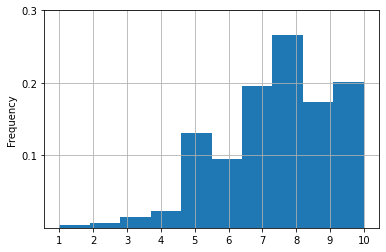

In [50]:
usefull_ratings.Book_Rating	.plot(kind = 'hist', 
                                  density = True, 
                                  figsize = [6,4], 
                                  xticks=[1,2,3,4,5,6,7,8,9,10], 
                                  yticks = [0.1, 0.2, 0.3],
                                  grid = True)

### End of preprocessing